# App Reviews Sentiment Analysis 

App Reviews Sentiment Analysis means evaluating and understanding the sentiment  expressed in user reviews of mobile applicatiions.

In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv("C:\\Users\\us\\Downloads\\linkedin-reviews.csv")

In [3]:
df.head() 

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# Exploratory Data Analysis 

We will start by analyzing the distributions of ratings. It will provide insight into the overall sentiment of the reviews. Then we can explore further, such as analyzing the length of reviews , and possibly derive insights from the text of the reviews. 

# Plotting the Distribution of Ratings 

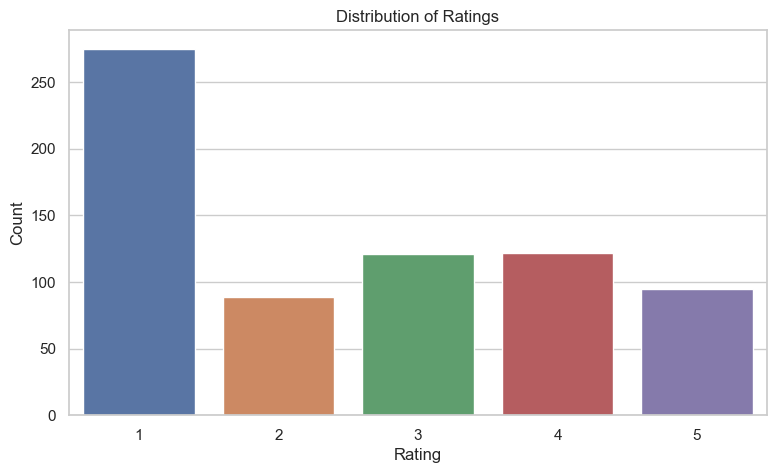

In [6]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df , x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Adding Sentiment Labels in the Data 

We will use Textblob library. Textblob provides a polarity scores raning from -1(very negative) to 1(very positive) for a given text . We can use this score to classify each review's sentiment as positive , negative or neutral . 

In [7]:
# !pip install textblob    

In [8]:
from textblob import TextBlob 

In [9]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1 :
        return 'Positive'
    elif sentiment.polarity < -0.1 :
        return 'Negative'
    else :
        return 'Neutral' 
    

In [10]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis) 

In [11]:
df.sample(5)

,Review,Rating,Sentiment
40,My picture don't load at the bottom...,3,Neutral
651,It messed up my contact list when it merged Li...,1,Positive
469,"Like that they tried to make or user friendly,...",3,Neutral
273,Would be good if app allowed to change profile..,4,Positive
172,"Great idea, but there is no access to your gro...",2,Positive


# Analyzing App Reviews Sentiments 


In [12]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution 

Sentiment
Positive    298
Neutral     297
Negative    107
Name: count, dtype: int64

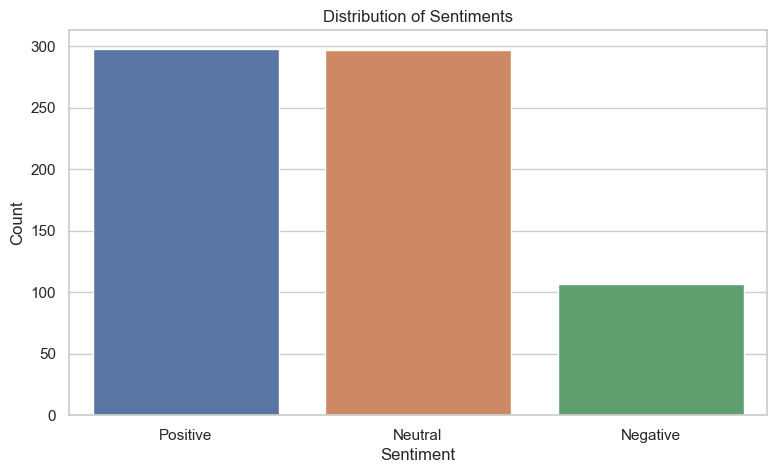

In [13]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
           y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# So , we can see althrough the app has low ratings , still the reviewers don't use many negative words in the reviews for the app. 

Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between  the sentiment of the text and numerical ratings. 

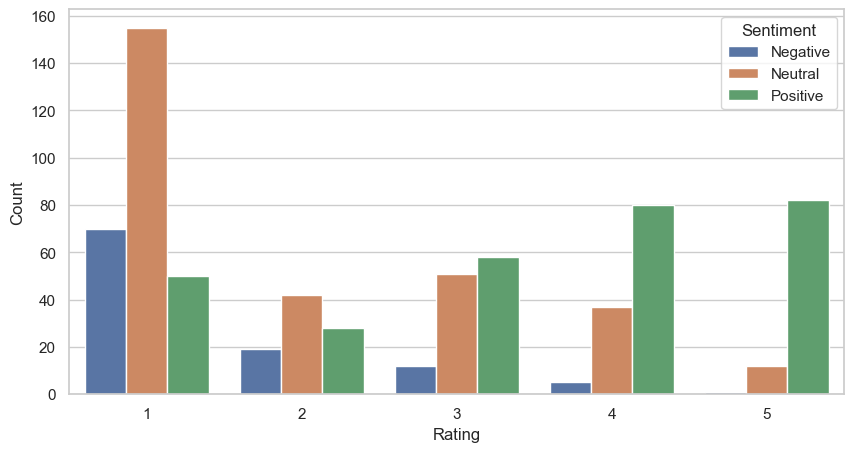

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
             x = 'Rating',
             hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show() 

# Now let's perform a text analysis to identify common words or themes within each sentiment category . It involves examining the most frequently occuring words in positive , negative and neutral reviews using a wordcloud.

In [15]:
from wordcloud import WordCloud 

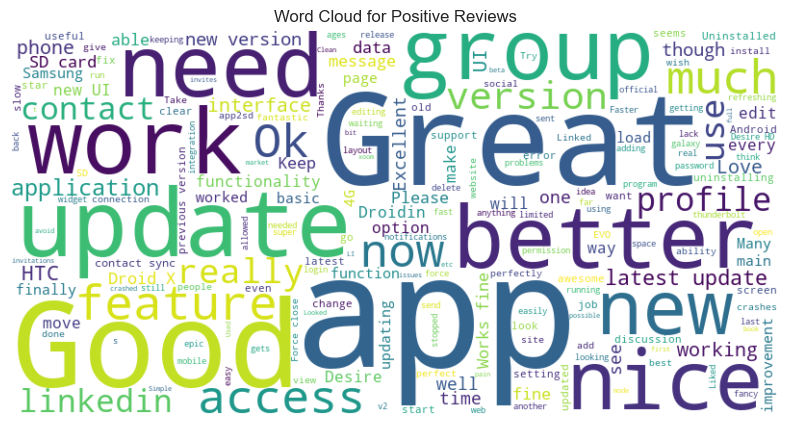

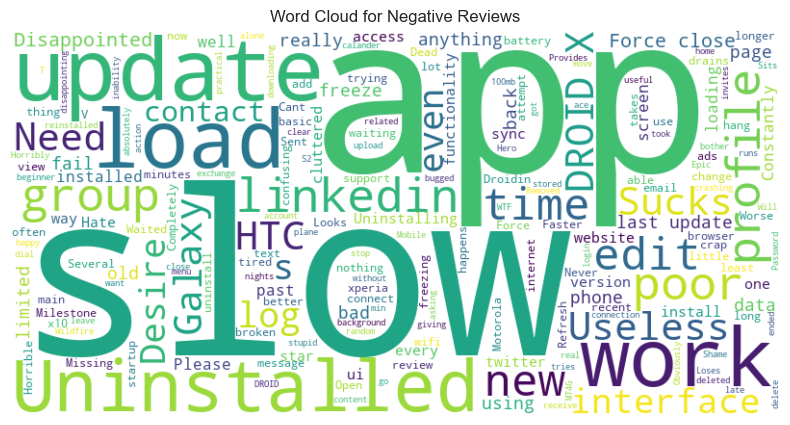

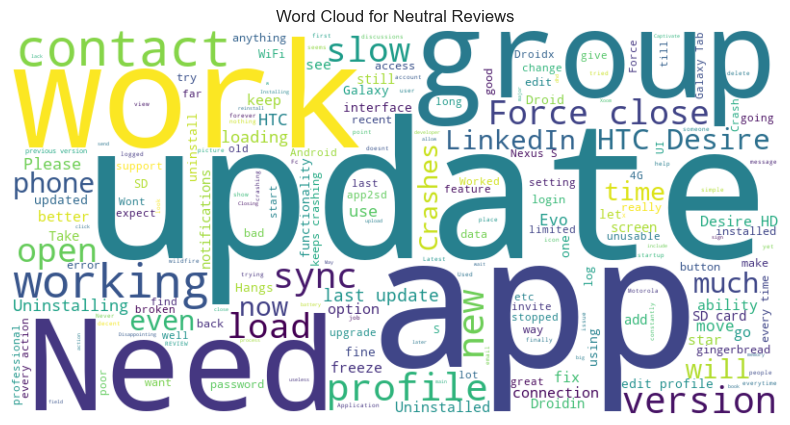

In [16]:
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in df[df['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()
    
    
#Generating word clouds for each sentiment 
for sentiment in ['Positive' , 'Negative' , 'Neutral']:
    generate_word_cloud(sentiment)

# Summary

App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback, prioritize feature updates and maintain a positive user community. It involves using data analysis tchniques to determine whether the sentiments in these reviews are positive , negative or neutral. 